In [1]:
import os
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_community.chat_models import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

os.getenv("OPENAI_API_KEY")

In [2]:
# Prompt
template = """Answer the following question
Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

# LLM API
# model = ChatOpenAI(
#     openai_api_key=os.getenv("OPENAI_API_KEY"),
#     temperature=0, max_tokens=2, model="gpt-3.5-turbo"
# )

# Local LLM
ollama_llm = "orca-mini:3b"
model_local = ChatOllama(model=ollama_llm)

# Chain
chain = (
    prompt
    | model_local
    | StrOutputParser()
)

In [3]:
# Question
answer = chain.invoke(
    {"question": "Explain attention free models"}
)

In [4]:
answer.split("\n")

[' Attention-free models are a type of machine learning model that are designed to learn from unstructured data, such as text or images. The name "attention-free" comes from the fact that these models do not require human attention to train or evaluate their performance. Instead, they use techniques like backpropagation and stochastic gradient descent to optimize their parameters automatically. ',
 '',
 'These models are particularly useful in situations where human intervention is costly or time-consuming, such as in natural language processing or computer vision tasks. They can also be used to improve the accuracy of existing models, by generating new training data that was not previously available. However, attention-free models may lack some of the interpretability and interpretability of traditional machine learning models, since they do not require human intervention to explain their decision-making process.']

**Mistral**

Trace: 24k prompt tokens.

* https://smith.langchain.com/public/3e04d475-ea08-4ee3-ae66-6416a93d8b08/r

--- 

Some considerations are noted in the [needle in a haystack analysis](https://twitter.com/GregKamradt/status/1722386725635580292?lang=en):

* LLMs may suffer with retrieval from large context depending on where the information is placed.

## LangServe

Create a LangServe app. 

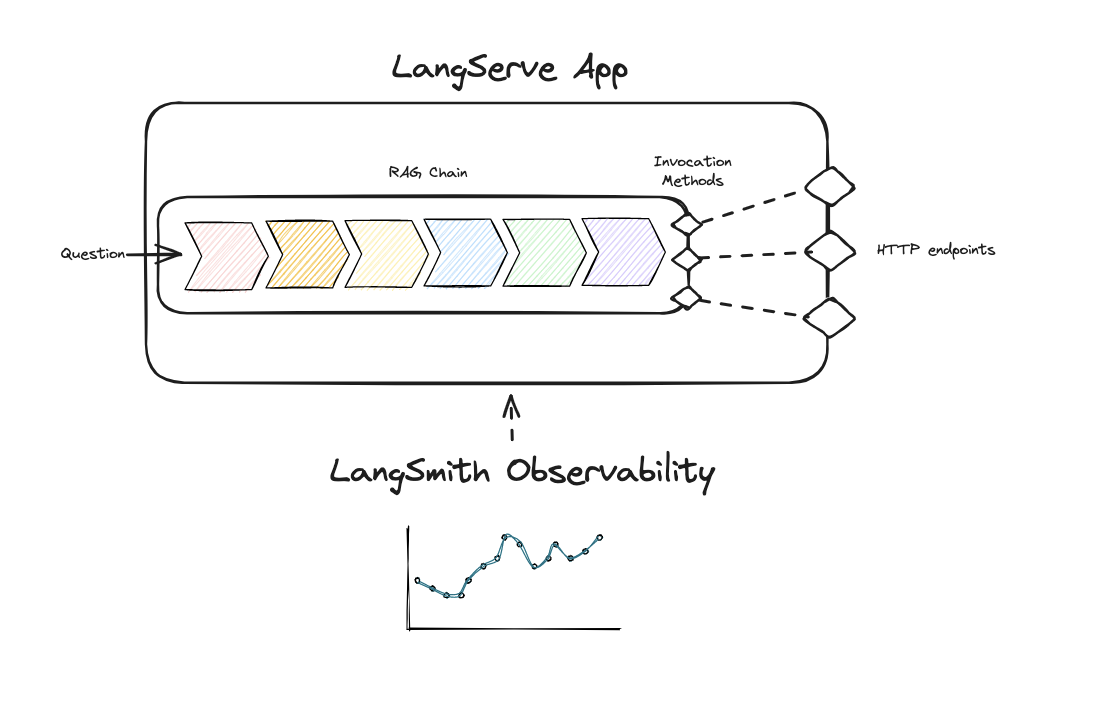

```
$ conda create -n template-testing-env python=3.11
$ conda activate template-testing-env
$ pip install -U "langchain-cli[serve]" "langserve[all]"
$ langchain app new .
$ poetry add langchain-nomic langchain_community tiktoken langchain-openai chromadb langchain
$ poetry install
```

---

Add above logic to new file `chain.py`.

---

Add to `server.py` -

```
from app.chain import chain as nomic_chain
add_routes(app, nomic_chain, path="/nomic-rag")
```

Run - 
```
$ poetry run langchain serve
```